In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import statistics as stat
import pylab

In [2]:

# dynamics for 'k' number of particle
k = 1 #number of particle
print('This is for number of particle = ', k)


# 2-dimensional motion
dim = 2
print('The dimension of brownian motion = ', dim)



#setting parameter in their SI unit
kb = 1.38e-23 #Boltzman constant
T = 298.15 # thermodynamics temperature
eta = 8.90e-4 # viscosity of water at room temperature
a = 2e-6  #radius of particle



#-------------Diffusion coefficient-----------------------
D = (kb*T)/(6*(math.pi)*eta*a) # Diffusion coefficient 
print("Diffusion constant (theoretical value):", D, "SI unit")




This is for number of particle =  1
The dimension of brownian motion =  2
Diffusion constant (theoretical value): 1.2262888365230538e-13 SI unit


In [48]:
#time interval setting
delta_t = 1  # time step length
end_t = 1e6  #maximum time to run dynamics
t_step = np.arange(0,end_t,delta_t) # creating intervals 
n = len(t_step)
print('Maximum time for simulation is in second :', end_t)
print('Total number of time steps :', n)




#----------------Parameter for Gaussian distribution
mu = 0  # mean value of Gaussian distribution
sigma = math.sqrt(2*D*delta_t) # standard deviation
print("sigma = ",sigma, "meter")


Maximum time for simulation is in second : 1000000.0
Total number of time steps : 1000000
sigma =  4.952350626769179e-07 meter


In [49]:

#--------array to store random steps in X direction of k particles  : 
arr_rand_x = [[0 for x in range(n)] for y in range(k)] 


# particles random steps in X direction generated by Psuedo random number generator(PRNG)--------------
count = 0
while (count < k):
    arr_rand_x[count] = np.random.normal(mu, sigma, n)
    count = count +1
    
#---------instantenous position along Y motion------
# k particles instantenous X position
arr_x = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_x[count] = np.cumsum(arr_rand_x[count])
    count = count +1


    


#--------array to store random steps in Y direction of k particles  : 
arr_rand_y = [[0 for x in range(n)] for y in range(k)] 


# K particle random steps in Y direction--------------
count = 0
while (count < k):
    arr_rand_y[count] = np.random.normal(mu, sigma, n)
    count = count +1

#---------instantenous position along Y motion------
# k particles instantenous Y position
arr_y = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_y[count] = np.cumsum(arr_rand_y[count])
    count = count +1

    
    

# starting from origin
count=0
while(count<k):
    arr_x[count][0] = 0
    arr_y[count][0] = 0
    count= count+1

#------------------color for graphs------------
#list of colors from which we will selected some random colors to distinguish one line from another line 
color =['aqua','black','blueviolet','brown','burlywood','cadetblue','chocolate','coral','cornflowerblue','darkblue','darkgoldenrod','darkgreen','darkorange','darkred','darksalmon','darkseagreen','darkslateblue','darkslategray','darkviolet','deeppink','deepskyblue','dodgerblue','firebrick','forestgreen','fuchsia','gold','goldenrod','gray','green','greenyellow','hotpink','lawngreen','lightgreen','lightpink','lightseagreen','lightsteelblue','lime','limegreen','magenta','maroon','mediumaquamarine','mediumblue','mediumorchid','mediumpurple','mediumseagreen','mediumturquoise','mediumvioletred','midnightblue','navy','olive','olivedrab','orange','orangered','orchid','palegreen','palevioletred','peachpuff','peru','pink','plum','powderblue','purple','red','rosybrown','royalblue','saddlebrown','salmon','sandybrown','seagreen','silver','skyblue','slateblue','slategray','springgreen','steelblue','tan','turquoise','violet','wheat','yellow','yellowgreen']




In [50]:

import random
color_list = random.sample(color,k)


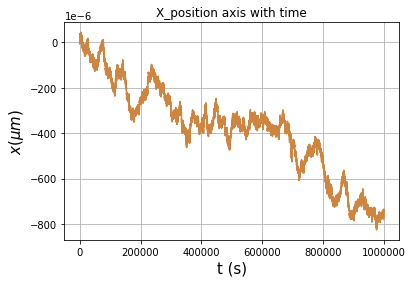

In [51]:

#-------x position with time------
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%  plotting ahead %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
#x position with time
count = 0
while(count<k):
    plt.plot(t_step,arr_x[count], color_list[count])
    count = count+1

        
plt.ticklabel_format(style='sci', axis='y', scilimits=(-6,-6))
  
plt.title('X_position axis with time')
plt.xlabel('t (s)', fontsize=15)
plt.ylabel(r'$x (\mu m)$', fontsize=15)
plt.grid(True)

#plt.savefig('Desktop/1p500s/x position with time.png')


plt.show()


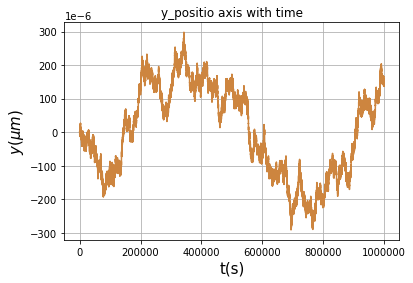

In [52]:
#x position with time
count = 0
while(count<k):
    plt.plot(t_step,arr_y[count], color_list[count])
    count = count+1

        
plt.ticklabel_format(style='sci', axis='y', scilimits=(-6,-6))
  
plt.title('y_positio axis with time')
plt.xlabel('t(s)', fontsize=15)
plt.ylabel(r'$y (\mu m)$', fontsize=15)
plt.grid(True)

#plt.savefig('Desktop/1p500s/y position with time.png')


plt.show()




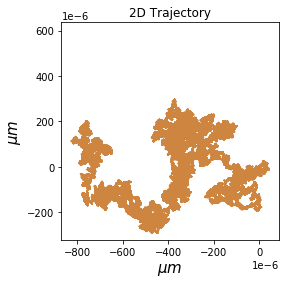

In [53]:

#plotting all particle msd in r with time
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% plotting ahead %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%    
#-----particle trajectory in x-y plane
count = 0
while(count<k):
    plt.plot(arr_x[count] ,arr_y[count] , color_list[count])
    count = count+1
    
plt.axis('square')
plt.ticklabel_format(style='sci', axis='x', scilimits=(-6,-6))
plt.ticklabel_format(style='sci', axis='y', scilimits=(-6,-6))

plt.title('2D Trajectory', )
plt.xlabel(r'$ \mu m$', fontsize=15)
plt.ylabel(r'$ \mu m$', fontsize=15)

#plt.savefig('Desktop/1p500s/position on x-y plane with time.png')

plt.show()


In [54]:

#----------------------------------------MEAN SQUARE DISPLACEMENT CALCULATION AHEAD-------------------------------

# -------------------------Mean square displacent function and Time lag----------------------- 
import statistics as stat
from numba import jit

# ---------mean square displacement function---------- 

@jit
def msd_1d(x):
    result = np.zeros_like(x)
    for delta in range(1,len(x)):
        thisresult = 0
        for i in range(delta,len(x)):
            thisresult += (x[i] - x[i-delta])**2
        result[delta] = thisresult / (len(x) - delta)
    return result
    



In [55]:


# -------------------------------------------mean square displacement  in X---------- 


arr_msd_1d_x = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_msd_1d_x[count] = msd_1d(arr_x[count])
    count = count +1
    
    
    

In [56]:

# -------------------------------------------mean square displacement  in Y---------- 


arr_msd_1d_y = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_msd_1d_y[count] = msd_1d(arr_y[count])
    count = count +1
    

In [57]:

# ---------------------------------------------- msd for R = (msd for x) + (msd for y) -------

arr_msd_2d = [[0 for x in range(n)] for y in range(k)] 
count = 0
while (count < k):
    arr_msd_2d[count] = arr_msd_1d_x[count] + arr_msd_1d_y[count] 
    count = count +1
    


# average of  msd in R direction for all particle trajectory 

m_avg = np.transpose(arr_msd_2d)

avg_msd_2d = np.zeros(n)

count = 0
while (count < n):
    avg_msd_2d[count] = stat.mean(m_avg[count])
    count = count + 1



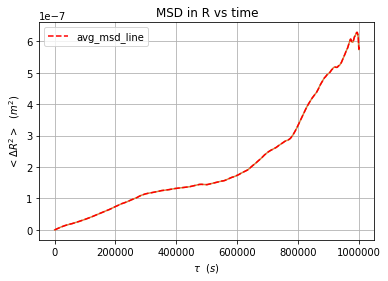

In [58]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% Plotting ahead %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
count = 0
while (count < k):
    plt.plot(t_step, arr_msd_2d[count], color_list[count])
    count = count +1

pylab.plot(t_step,avg_msd_2d,'r--', label = 'avg_msd_line')
pylab.legend(loc='upper left')

plt.title('MSD in R vs time')
plt.ylabel(r'$<\Delta R^2> \ \  (m^2)$')
plt.xlabel(r'$\tau \ \  (s)$')
pylab.legend(loc='upper left')

#plt.savefig('__msd for R_20p_1000s.png')
plt.grid(True)
plt.show()



In [59]:


#--------------------------------------------------magnifying plottig  near origin of msd in R 
t_limit = 10
m = int(t_limit/delta_t)

arr_msd_sliced = [[0 for x in range(n)] for y in range(k)] 

t_step_m = np.linspace(0,t_limit,m-1) # creating intervals 

avg_msd_sliced = (avg_msd_2d)[1:m:1]

count = 0
while (count < k):
    arr_msd_sliced[count] = (arr_msd_2d[count])[1:m:1]
    count = count +1

#t_step_m = np.linspace(0,m*delta_t,m-1) # creating intervals 

avg_msd_sliced = (avg_msd_2d)[1:m:1]


# # best fit line

# In[11]:


In [60]:

from scipy.stats import linregress
linregress(t_step_m,  avg_msd_sliced)

D_sim = (linregress(t_step_m,  avg_msd_sliced)[0])/(2*dim)


print('Simulation diffusion coefficient',D_sim)

print('theoretocal diffusion coefficient',D)



# In[12]:


# relative error in Diffusion constant
rel_err = (abs((D_sim - D)/D))* 100
print('relative error is: %.2f %%' %rel_err)


Simulation diffusion coefficient 9.807150251223816e-14
theoretocal diffusion coefficient 1.2262888365230538e-13
relative error is: 20.03 %
